<a href="https://colab.research.google.com/github/danielperezh/Machine_learning/blob/main/P1_5_KMEANS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#K-means números aleatorios

##Importar bibliotecas

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
#guardar los graficos en el cuaderno de jupyter
%matplotlib inline

##creamos unos arrays con números aleatorios

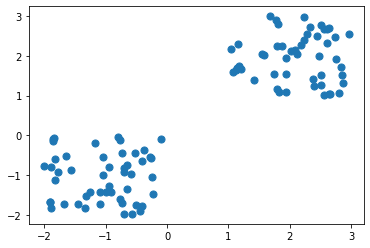

In [ ]:
#array de 100x2
X= -2 * np.random.rand(100,2)
#cambiamos datos de la columna 0 entre el 50 al 100 con datos lejanos
X[50:100, :] = 1 + (2 * np.random.rand(50,2))
#generamos dos grupos (columna1 y columna2)
plt.scatter(X[ : , 0], X[ :, 1], s = 50)
plt.show()

##Creamos la instancia del algoritmo

In [ ]:
#como sabemos de entrada que son dos grupos entonces seran dos centroides
Kmean = KMeans(n_clusters=2)
Kmean.fit(X)

KMeans(n_clusters=2)

##buscamos los centroides

In [ ]:
Centros = Kmean.cluster_centers_

##dibujamos los centroides para cada clouster

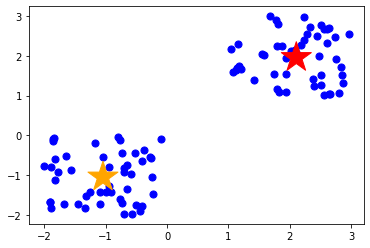

In [ ]:
colores=['orange','red']
plt.scatter(X[ : , 0], X[ : , 1], s =50, c='b')
plt.scatter(Centros[:, 0], Centros[:, 1], marker='*', c=colores, s=1000)
plt.show()

##probando el algoritmo


In [ ]:
#forma como se crearon los cluster (0 y 1)
Kmean.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

##Probando con datos manuales

In [ ]:
#https://www.w3resource.com/numpy/manipulation/reshape.php
data_test=np.array([-3.0,-3.0]).reshape(1, -1)
Kmean.predict(data_test)

array([0], dtype=int32)

#k-means prestamos bancarios

##importando librerias

In [ ]:
import pandas as pd
import numpy as np
import random as rd

from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min

import matplotlib.pyplot as plt
import seaborn as sb
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

##importando dataset

In [ ]:
df_bank = pd.read_csv("https://raw.githubusercontent.com/luisFernandoCastellanosG/Machine_learning/master/1-Machine_Learning_Classic/Databasets/k-means-prestamos.csv")
df_bank.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


##conociendo los datos

In [ ]:
df_bank.describe()
df_bank.isnull().sum()

Loan_ID               0
Gender                5
Married               0
Dependents            8
Education             0
Self_Employed        21
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     11
Credit_History       30
Property_Area         0
Loan_Status           0
dtype: int64

tomaremos sólo dos variables de los datos – "LoanAmount"/monto del prestamos y "ApplicantIncome"/ingresos del cliente 

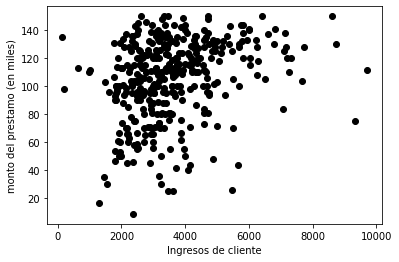

In [ ]:
X = df_bank[["LoanAmount","ApplicantIncome"]]
#Visualizamos los datos
plt.scatter(X["ApplicantIncome"],X["LoanAmount"],c='black')
plt.xlabel('Ingresos de cliente')
plt.ylabel('monto del prestamo (en miles)')
plt.show()

##buscando los centroides

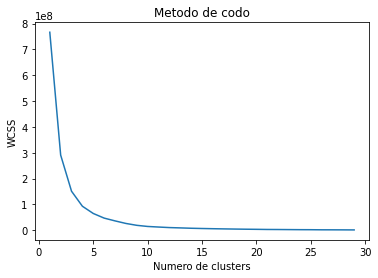

In [ ]:
#WCSS es la suma de cuadrados de las distancias
wcss = []
for i in range(1, 30):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 30), wcss)
plt.title('Metodo de codo')
plt.xlabel('Numero de clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=5).fit(X)
centroids = kmeans.cluster_centers_
labels = kmeans.predict(X)
print(centroids)
print(labels)

[[ 112.80263158 4489.93421053]
 [  95.96581197 2196.5042735 ]
 [ 117.23076923 7852.07692308]
 [ 103.9375     3336.08333333]
 [ 119.61290323 5910.38709677]]
[0 3 1 4 1 3 1 1 1 0 3 3 0 1 2 1 3 3 0 1 3 3 0 3 1 3 3 3 1 1 0 0 3 4 4 1 0
 1 3 0 0 1 1 3 3 1 3 0 3 2 0 1 3 0 3 1 3 3 0 1 3 1 3 3 0 3 1 1 0 1 0 3 2 1
 4 3 0 1 0 1 3 3 1 1 3 0 0 3 0 1 1 1 0 4 1 3 3 1 3 2 0 1 1 1 3 0 3 1 3 1 1
 0 3 1 1 0 3 0 1 3 1 3 0 0 3 0 1 3 3 4 3 3 1 3 0 0 1 0 3 4 0 1 3 3 3 3 3 3
 4 1 4 3 4 2 4 3 1 3 1 4 4 0 1 2 0 0 3 3 3 3 1 3 1 3 0 0 1 1 3 1 3 0 3 0 3
 4 0 0 1 1 3 0 1 0 3 1 3 3 1 4 3 3 1 3 1 0 3 0 0 1 0 3 3 4 0 1 3 1 3 1 4 1
 3 3 3 0 0 3 4 4 1 0 3 1 0 2 0 3 4 3 2 0 3 1 1 4 1 1 3 3 3 3 3 1 3 1 1 1 0
 1 1 3 1 3 1 3 4 1 1 2 1 0 4 3 1 2 4 1 3 1 2 0 3 0 3 3 1 1 0 1 2 3 0 0 2 0
 0 4 3 1 0 1 0 1 3 3 1 1 3 1 1 3 3 3 1 0 3 1 3 0 3 3 3 3 1 3 1 3 3 1 1 4 3
 1 4 0 3 1 3 3 0 1 3 1 3 3 1 0 3 3 4 1 3 4 0 3 3 1 3 4 3 3 3 1 1 3 1 3 1 1
 0 1 3 3 3 3 4 3 3 0 0]


##graficando datos y centroides

In [ ]:
colores=['blue','red','green','yellow','cyan']
asignar=[]
for row in labels:
    asignar.append(colores[row])

[112.80263158  95.96581197 117.23076923 103.9375     119.61290323]


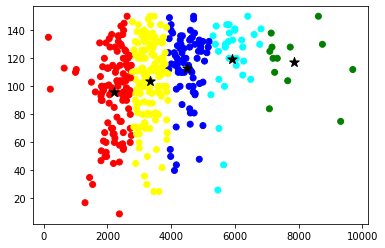

In [ ]:
print(centroids[:, 0])
# mostramos grupos según Openess y Extraversion 
f1 = df_bank['ApplicantIncome'].values
f2 = df_bank['LoanAmount'].values
 
plt.scatter(f1, f2, c=asignar)
#
plt.scatter(centroids[:, 1], centroids[:, 0], marker='*', c='black', s=100)
plt.show()

##resultados en tablas

In [ ]:
df_cluster = pd.DataFrame()
df_cluster['data_index']= df_bank.index.values
df_cluster['data_index']= df_bank.Education
df_cluster['cluster']=kmeans.labels_
df_cluster.head()

,data_index,cluster
0,Graduate,2
1,Graduate,3
2,Not Graduate,1
3,Graduate,4
4,Not Graduate,1


In [ ]:
df_cluster[df_cluster.cluster == 4]

,data_index,cluster
3,Graduate,4
33,Graduate,4
34,Graduate,4
74,Graduate,4
93,Graduate,4
129,Not Graduate,4
139,Graduate,4
148,Graduate,4
150,Graduate,4
152,Graduate,4


#k-means psicología (los grandes cinco)
https://www.aprendemachinelearning.com/k-means-en-python-paso-a-paso/

##Importando librerías

In [ ]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min

import matplotlib.pyplot as plt
import seaborn as sb
from mpl_toolkits.mplot3d import Axes3D

#configuraciones basicas para PLT
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

##importando dataset

In [ ]:
df_psico = pd.read_csv("https://raw.githubusercontent.com/luisFernandoCastellanosG/Machine_learning/master/1-Machine_Learning_Classic/Databasets/k-means-psicologia.csv")
df_psico.head(5)

,usuario,op,co,ex,ag,ne,wordcount,categoria
0,3gerardpique,34.297953,28.148819,41.948819,29.370315,9.841575,37.0945,7
1,aguerosergiokun,44.986842,20.525865,37.938947,24.279098,10.362406,78.7970,7
2,albertochicote,41.733854,13.745417,38.999896,34.645521,8.836979,49.2604,4
3,AlejandroSanz,40.377154,15.377462,52.337538,31.082154,5.032231,80.4538,2
4,alfredocasero1,36.664677,19.642258,48.530806,31.138871,7.305968,47.0645,4


##conociendo los datos

In [ ]:
df_psico.describe()
#df_psico.isnull().sum()

,op,co,ex,ag,ne,wordcount,categoria
count,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000
mean,44.414591,22.977135,40.764428,22.918528,8.000098,98.715484,4.050000
std,8.425723,5.816851,7.185246,7.657122,3.039248,44.714071,2.658839
min,30.020465,7.852756,18.693542,9.305985,1.030213,5.020800,1.000000
25%,38.206484,19.740299,36.095722,17.050993,6.086144,66.218475,2.000000
50%,44.507091,22.466718,41.457492,21.384554,7.839722,94.711400,3.500000
75%,49.365923,26.091606,45.197769,28.678866,9.758189,119.707925,7.000000
max,71.696129,49.637863,59.824844,40.583162,23.978462,217.183200,9.000000


###graficando

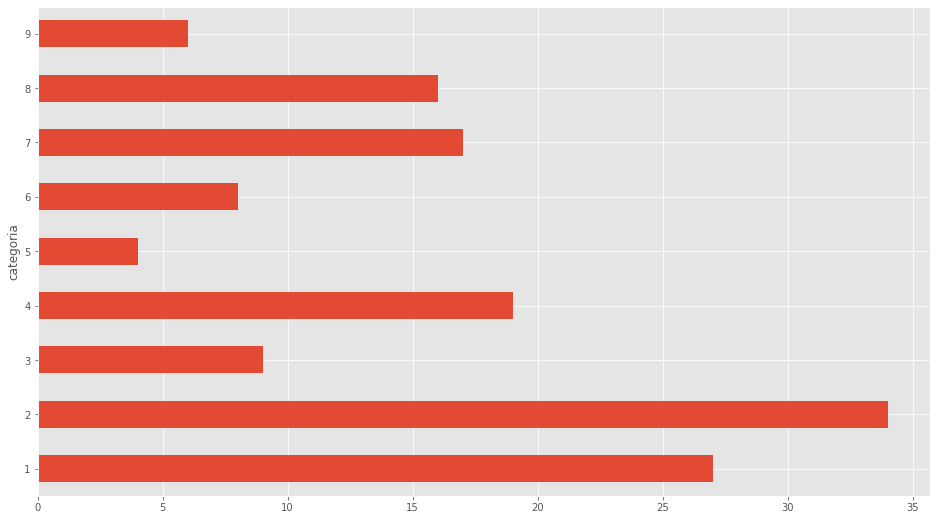

In [ ]:
df_psico.groupby('categoria').size().plot.barh()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


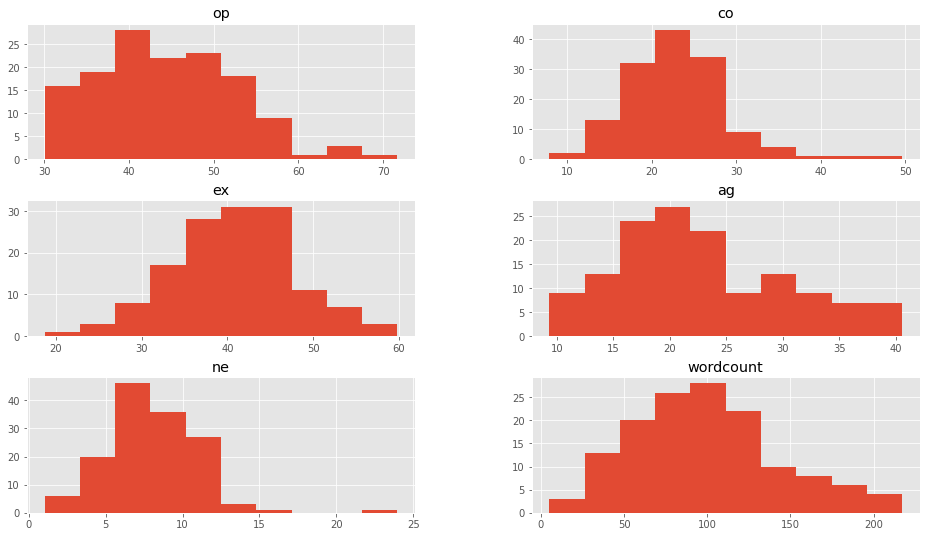

In [ ]:
#Dispersión de los mismos datos
df_psico.drop(['categoria'],1).hist()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


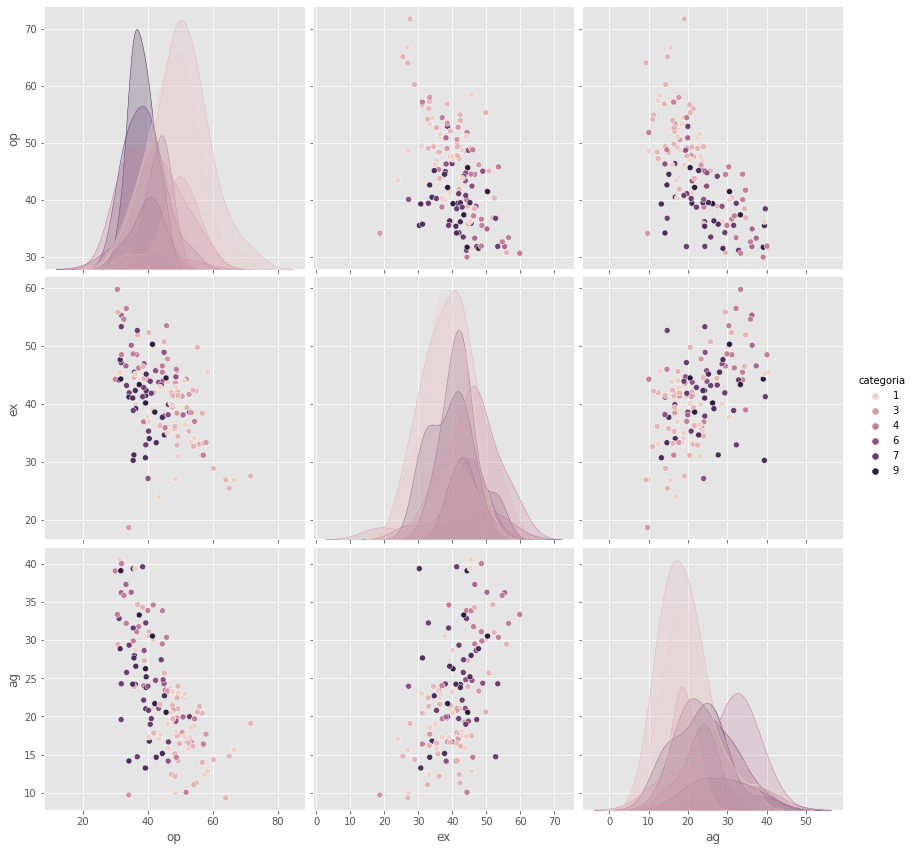

In [ ]:
#graficos de relaciones en pares en el dataset.
#hue= variación de colores dependiendo del valor de la variable
sb.pairplot(df_psico, hue='categoria',size=4,vars=["op","ex","ag"],kind='scatter')
#Revisando la gráfica no pareciera que hay algún tipo de agrupación o correlación entre los usuarios y sus categorías. 

##Separamos datos (X y Y)
Aca no trabajaremos con **train** y **test** pues no es un algoritmo de aprendizaje supervisado

In [ ]:
#X = np.array(df_psico[["op","ex","ag"]])
X = np.array(df_psico[["op","co","ex","ag","ne"]])
y = np.array(df_psico['categoria'])
#forma de la matriz
X.shape

(140, 5)

###Graficamos los valores de X en un grafico 3D

['black', 'black', 'cyan', 'green', 'cyan', 'black', 'black', 'yellow', 'black', 'black', 'blue', 'red', 'red', 'green', 'pink', 'blue', 'cyan', 'orange', 'green', 'cyan', 'green', 'blue', 'blue', 'black', 'green', 'cyan', 'pink', 'red', 'cyan', 'blue', 'pink', 'red', 'green', 'black', 'cyan', 'yellow', 'red', 'green', 'green', 'red', 'orange', 'green', 'orange', 'red', 'red', 'green', 'orange', 'blue', 'red', 'black', 'green', 'pink', 'orange', 'green', 'pink', 'green', 'red', 'blue', 'pink', 'green', 'pink', 'cyan', 'green', 'red', 'pink', 'brown', 'red', 'red', 'green', 'cyan', 'orange', 'pink', 'pink', 'cyan', 'brown', 'green', 'pink', 'cyan', 'cyan', 'brown', 'yellow', 'green', 'cyan', 'red', 'green', 'black', 'green', 'blue', 'green', 'red', 'green', 'black', 'green', 'green', 'red', 'black', 'black', 'green', 'cyan', 'orange', 'red', 'red', 'red', 'cyan', 'green', 'cyan', 'green', 'pink', 'black', 'yellow', 'brown', 'brown', 'pink', 'brown', 'black', 'red', 'pink', 'green', 'cya

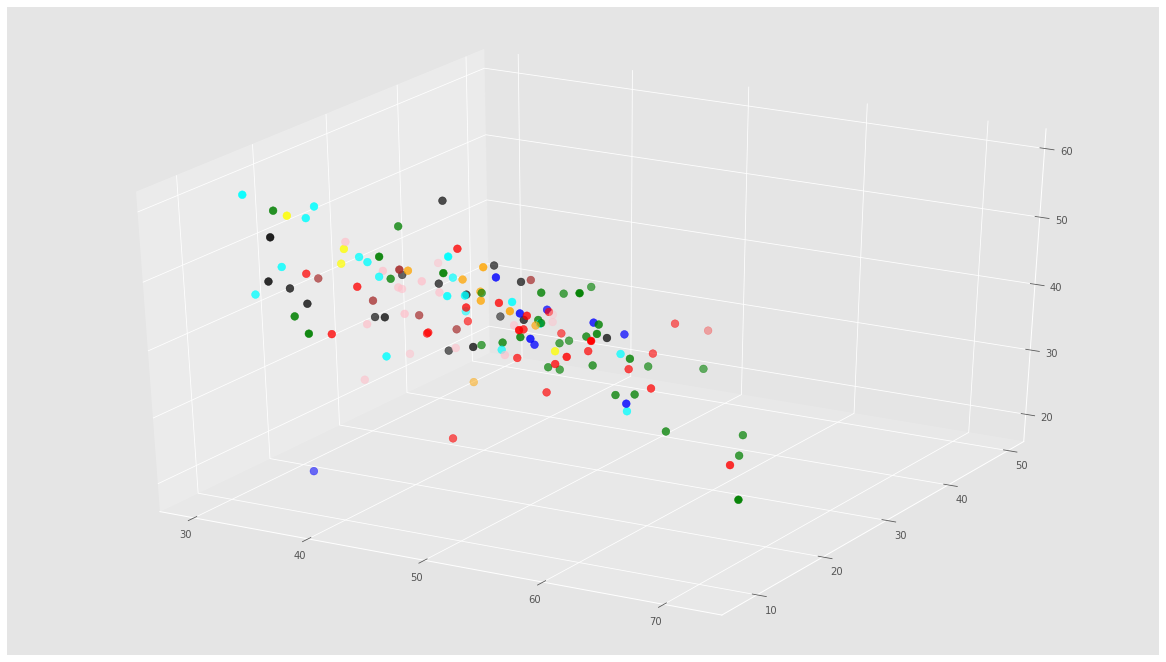

In [ ]:
fig = plt.figure()
ax = Axes3D(fig)
#10 categorias / 10 colores
colores=['blue','red','green','blue','cyan','yellow','orange','black','pink','brown','purple']
asignar=[]
for row in y:
    asignar.append(colores[row])
print(asignar)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=60)

##encontramos el total de clousters (agrupamientos) idoneo
usaremos el método de codo

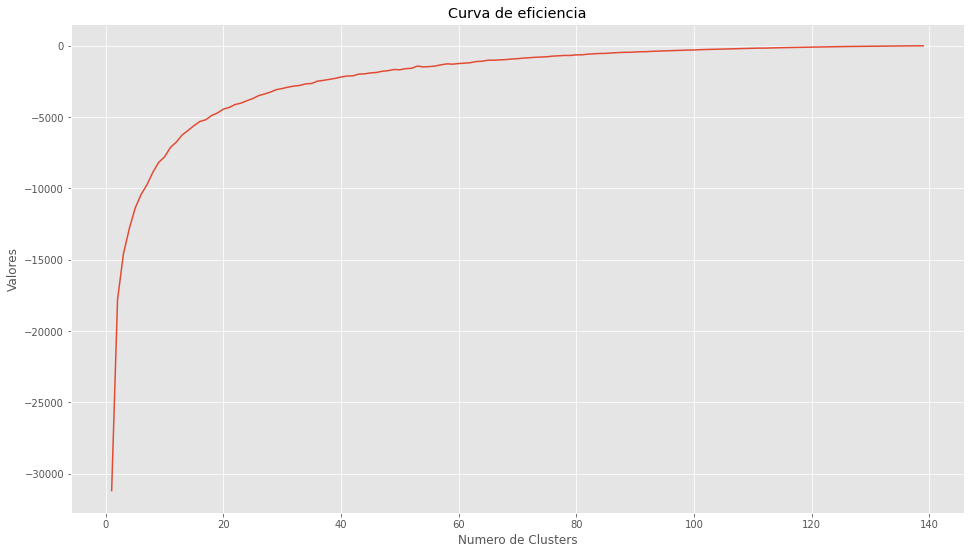

In [ ]:
Nc = range(1, 140)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Numero de Clusters')
plt.ylabel('Valores')
plt.title('Curva de eficiencia')
plt.show()

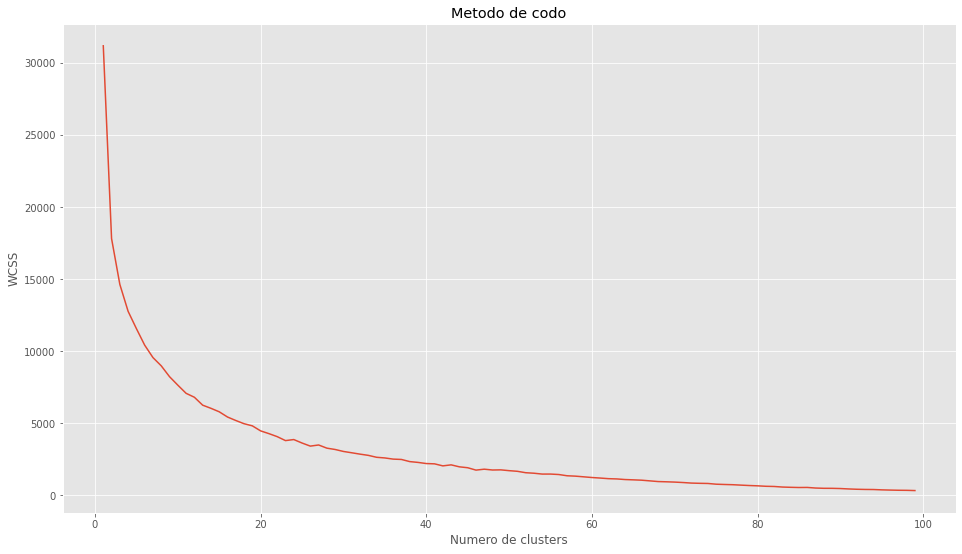

In [ ]:
wcss = []
for i in range(1, 100):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 100), wcss)
plt.title('Metodo de codo')
plt.xlabel('Numero de clusters')
plt.ylabel('WCSS')
plt.show()

##Conocer los centroides

In [ ]:
kmeans = KMeans(n_clusters=20).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)

[[45.92849358 22.37795733 38.640125   21.48050925  9.94633667]
 [57.8028975  22.58813733 33.04155933 15.16237367  5.94446233]
 [33.26774456 18.42006733 45.57173389 38.28703733  8.70785756]
 [43.515365   42.46817433 30.358012   12.60759133  9.538579  ]
 [36.876535   21.7772704  46.9687234  31.4740654   8.0273379 ]
 [31.89659283 15.92909    55.9515465  31.92967183  5.00179033]
 [51.71584617 22.23953908 42.46980933 15.76166858  5.23133467]
 [37.34527075 22.37760212 36.411127   31.527046    9.44315575]
 [54.1773595  33.608368   33.12453375 16.442867    7.9443275 ]
 [38.81528    17.4348775  21.3382215  13.3573675   8.9133485 ]
 [39.04576567 29.47645767 35.28579317 19.50613267 10.87893267]
 [66.8561865  21.1855165  26.7036905  14.69732775  3.6431125 ]
 [46.4802215  28.23085825 39.52290358 17.0008185   8.65197583]
 [51.61228973 24.65802009 34.97244255 21.36356582  7.53736927]
 [43.08046483 18.2741395  49.704888   30.92410217  4.88118117]
 [46.46737467 20.7103045  47.84665317 23.93193383  6.29

##visualizar grupos y centroides

In [ ]:
#3 dimensiones que utilizamos: Openess, Extraversion y Agreeablenes. 
#Pareciera que no hay necesariamente una relación en los grupos con sus actividades de Celebrity.
labels = kmeans.predict(X)
# Getting the cluster centers
C = kmeans.cluster_centers_
colores=['blue','red','green','yellow','cyan','orange','black','pink','brown','purple','silver',]
asignar=[]
for row in labels:
    asignar.append(colores[row])
 
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=60)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c=colores, s=1000)

IndexError: ignored

In [ ]:
labels = kmeans.predict(X)
labels


array([14, 16, 11, 12,  1, 15, 15,  7, 18,  6,  5,  9,  2, 16,  9,  5,  1,
        9,  5, 11,  1,  5,  3, 11, 18, 16,  1, 15, 10, 16,  4,  5, 16,  2,
        7, 11, 10,  7, 15, 16, 13, 12, 13,  6, 17, 17,  9,  2, 11,  7,  5,
       14,  1,  8,  6,  2, 16,  0,  6,  2, 18, 14,  2,  2, 14,  9,  8, 19,
        2, 12, 13,  4, 18,  5,  9,  2, 14,  1,  7, 11, 11,  0,  2,  5, 16,
        0,  5, 13, 18,  0, 18,  4, 16,  0,  5, 14, 11,  5,  1, 18, 17, 16,
       16,  7,  8,  2, 15, 14,  9, 16,  0,  1,  1, 12, 14,  9,  4,  8, 10,
       14, 16,  1,  5, 18, 17,  3,  6,  5,  5,  9,  5,  5, 18,  0,  2,  6,
       11,  8, 16, 11], dtype=int32)

##visualización en 2D

In [ ]:
# mostramos grupos según Openess y Extraversion 
f1 = df_psico['op'].values
f2 = df_psico['ex'].values
 
plt.scatter(f1, f2, c=ramdon(20), s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.show()

NameError: ignored

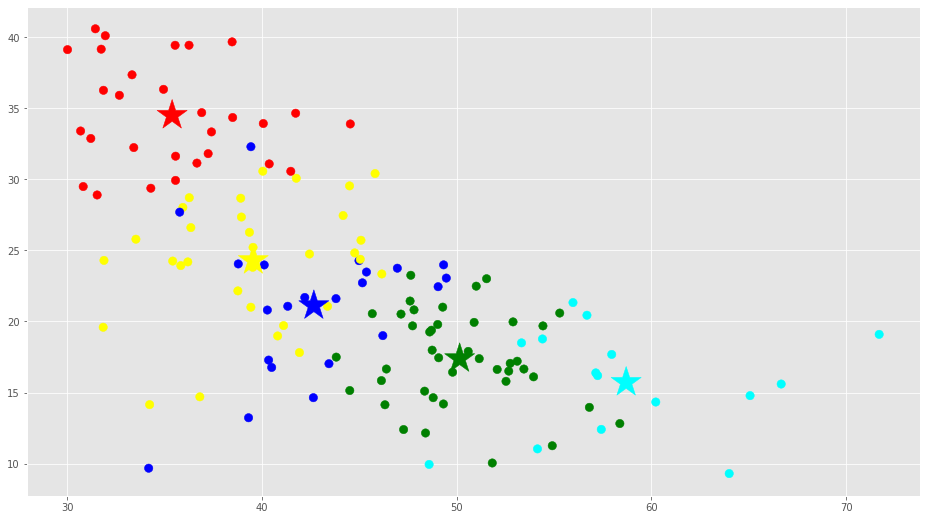

In [ ]:
f1 = df_psico['op'].values
f2 = df_psico['ag'].values
 
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 2], marker='*', c=colores, s=1000)
plt.show()

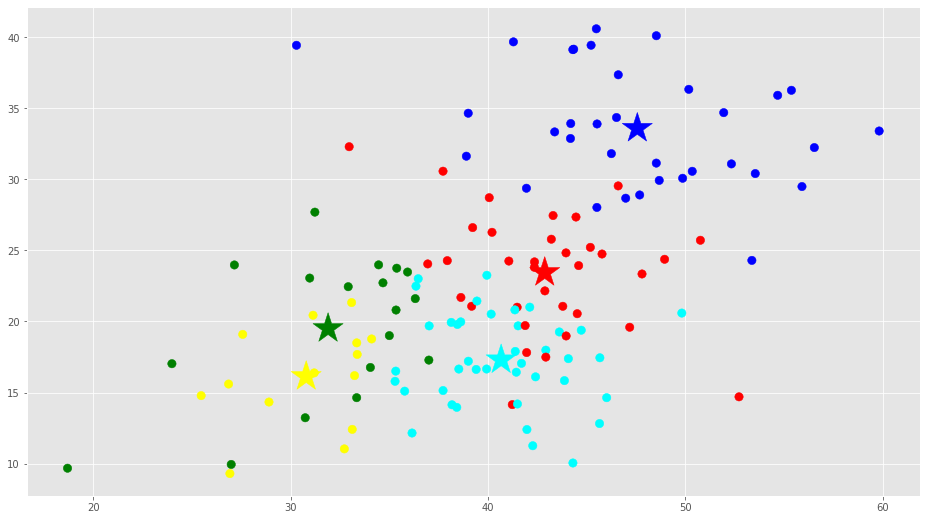

In [ ]:
f1 = df_psico['ex'].values
f2 = df_psico['ag'].values
 
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 1], C[:, 2], marker='*', c=colores, s=1000)
plt.show()

##Ver resultados en tablas

In [ ]:
copy =  pd.DataFrame()
copy['usuario']=df_psico['usuario'].values
copy['categoria']=df_psico['categoria'].values
copy['label'] = labels;
cantidadGrupo =  pd.DataFrame()
cantidadGrupo['color']=colores
cantidadGrupo['cantidad']=copy.groupby('label').size()
cantidadGrupo

,color,cantidad
0,blue,22
1,red,29
2,green,42
3,yellow,32
4,cyan,15


###diversidad por categorias laborales

In [ ]:
group_referrer_index = copy['label'] ==0
group_referrals = copy[group_referrer_index]
 
diversidadGrupo =  pd.DataFrame()
diversidadGrupo['categoria']=[0,1,2,3,4,5,6,7,8,9]
diversidadGrupo['cantidad']=group_referrals.groupby('categoria').size()
diversidadGrupo

,categoria,cantidad
0,0,NaN
1,1,3.0
2,2,4.0
3,3,NaN
4,4,12.0
5,5,3.0
6,6,1.0
7,7,5.0
8,8,3.0
9,9,3.0


##usuarios con rasgos de personalidad más similares

In [ ]:
df_cluster = pd.DataFrame()
df_cluster['data_index']= df_psico.index.values
df_cluster['data_index']= df_psico.usuario
df_cluster['cluster']=kmeans.labels_
df_cluster.head()

,data_index,cluster
0,3gerardpique,1
1,aguerosergiokun,0
2,albertochicote,1
3,AlejandroSanz,1
4,alfredocasero1,1


In [ ]:
df_cluster[df_cluster.cluster == 3]

,data_index,cluster
5,alo_oficial,3
6,andresiniesta8,3
14,BarackObama,3
17,BillGates,3
26,CFKArgentina,3
27,charliesheen,3
28,ChristianG_7,3
30,Clyburn,3
36,DANIROVIRA,3
38,David_Busta,3


###usuarios más relevantes en cada clouster

In [ ]:
#vemos el representante del grupo, el usuario cercano a su centroid
closest, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_, X)
closest
users=df_psico['usuario'].values
for row in closest:
    print(users[row])

kobebryant
SerranoIsmael
carmenelectra
Pablo_Iglesias_
JudgeJudy


##clasificando nuevos datos

In [ ]:
X_new = np.array([[45.92,57.74,15.66]]) #davidguetta
 
new_labels = kmeans.predict(X_new)
print(new_labels)

[3]


# DATOS DE MERCADO DE VALORES (índice S&P 500)

---


*   El índice Standard & Poor's 500, también conocido como S&P 500, es uno de los índices bursátiles más importantes de Estados Unidos. Al S&P 500 se lo considera el índice más representativo de la situación real del mercado (https://en.wikipedia.org/wiki/List_of_S%26P_500_companies)
*   Lista de empresas que forman parte del índice Dow Jones Industrial Average de https://en.wikipedia.org/wiki/Dow_Jones_Industrial_Average



---
Tomaremos los datos publicados en https://www.kaggle.com/camnugent/sandp500

La data (CSV) tiene las siguientes columnas: Fecha - en formato: yy-mm-dd



*   OPEN-Abierto - precio de la acción en el mercado abierto (estos son datos de NYSE, así que todo en USD)
*   HIGH - Alto - Precio más alto alcanzado en el día
*   Low Close - Precio más bajo alcanzado en el día
*   Volumen - Número de acciones negociadas   
*   nombre: el nombre del ticker de la acción

##instalando librerias

In [ ]:
# necesitamos la libreria WIKITABLES para descargar tablas de Wikipedia (y mantener actualizada la data)
# Necesitamos la libreria FSSPEC (Interfaces de sistema de archivos para Python)
# Necesitamos la libreria  beautifulsoup4 : para raspado web altamente evolucionadas
!pip install wikitables
!pip install fsspec
!pip install beautifulsoup4 

     |████████████████████████████████| 10.1 MB 8.6 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 176 kB 41.0 MB/s 
  Created wheel for pycountry: filename=pycountry-22.3.5-py2.py3-none-any.whl size=10681845 sha256=7ae47177f86c99fef8aa0ed67af735468afaa6213354d19a20652f57e22ac041
  Stored in directory: /root/.cache/pip/wheels/0e/06/e8/7ee176e95ea9a8a8c3b3afcb1869f20adbd42413d4611c6eb4
Successfully built pycountry
     |████████████████████████████████| 134 kB 8.0 MB/s 


##Importando librerías

In [ ]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn import preprocessing  #para normalizar los datos antes de aplicar al algoritmo
from sklearn.metrics import pairwise_distances_argmin_min

import matplotlib.pyplot as plt
import seaborn as sb
from mpl_toolkits.mplot3d import Axes3D   #para graficas en 3D

import requests                           # libreria para manejar pedidos internet
from bs4 import BeautifulSoup             # libreria para parsear documentos HTML

#from wikitables import import_tables    # para descargar tablas de Wikipedia
from sklearn.decomposition import PCA   # Análisis de componentes principales (PCA).

#configuraciones basicas para PLT
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

##importando dataset

In [ ]:
df_acciones = pd.read_csv("https://raw.githubusercontent.com/luisFernandoCastellanosG/Machine_learning/master/1-Machine_Learning_Classic/Databasets/K_means_indice_S%26P_500.csv")
df_acciones.head(5)

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


## conociendo y Preprocesando los datos



Vamos a usar datos semanales desde 2013 a 2018, donde cada acción tiene su propio rango de valores. Por ejemplo:
 

*   Apple (APPL) empieza en $67.85

*   Adobe (ADBE) en $39.12.

---

La intención de este ejercicio es agrupar las acciones por el comportamiento de sus ganancias, en vez de por su precio de mercado. De esta forma el rendimiento de cada acción es comparable con los demás.


In [ ]:
#df_acciones.info()
#df_acciones.shape
#df_acciones.describe()
df_acciones.isnull().sum()

date       0
open      11
high       8
low        8
close      0
volume     0
Name       0
dtype: int64

###Eliminando filas vacias
---

eliminamos los datos vacíos (NA) y resetamos el índice

In [ ]:
df_acciones = df_acciones.dropna()   # Se eliminan filas que tengan valor NaN.
df_acciones = df_acciones.reset_index(drop=True)

###cambiando el tipo de dato en columnas

In [ ]:
df_acciones['date']=pd.to_datetime(df_acciones['date'])       # Convertimos el campo DATE en tipo fecha
df_acciones = df_acciones.rename(columns={'Name':'symbol'})   #cambiamos el nombre la col de NAME a  SYMBOL
df_acciones.head()

,date,open,high,low,close,volume,symbol
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


###Descargamos la lista de las 500 compañias S&P 

---

Descargamos la tabla de wikipedia [ https://en.wikipedia.org/wiki/List_of_S%26P_500_companies ] y la guárdamos para su uso posterior

In [ ]:
wikiurl="https://en.wikipedia.org/wiki/List_of_S%26P_500_companies"   # pagina de wikipedia donde esta la tabla
table_class="wikitable sortable jquery-tablesorter"                   # clase de la tabla
response=requests.get(wikiurl)                                        # hacemos un request(petición)a la pagina
print(response.status_code)
# parse data from the html into a beautifulsoup object
soup = BeautifulSoup(response.text, 'html.parser')                    # parceamos el texto htmlt
indiatable=soup.find('table',{'id':"constituents"})                   # buscamos el objecto puede ser por la clase o por el ID
df_list_table=pd.read_html(str(indiatable))                                      # LEEMOS el THEAD y TBODY y lo guardamos en una lista
df_companies=pd.DataFrame(df_list_table[0])                                        # convertimos la lista en un dataframe
df_companies.to_csv('companies.csv', index_label='row')
df_companies.head()


200


,Symbol,Security,SEC filings,GICS Sector,GICS Sub-Industry,Headquarters Location,Date first added,CIK,Founded
0,MMM,3M,reports,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1976-08-09,66740,1902
1,AOS,A. O. Smith,reports,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott,reports,Health Care,Health Care Equipment,"North Chicago, Illinois",1964-03-31,1800,1888
3,ABBV,AbbVie,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ABMD,Abiomed,reports,Health Care,Health Care Equipment,"Danvers, Massachusetts",2018-05-31,815094,1981


###Descargamos la lista de las empresas que cotizan con el índice bursáil DOW JONES DJIA 

---

Descargamos la tabla de wikipedia [https://en.wikipedia.org/wiki/Dow_Jones_Industrial_Average] y la guárdamos para su uso posterior

In [ ]:
wikiurl="https://en.wikipedia.org/wiki/Dow_Jones_Industrial_Average"   # pagina de wikipedia donde esta la tabla
table_class="wikitable sortable jquery-tablesorter"                   # clase de la tabla
response=requests.get(wikiurl)                                        # hacemos un request(petición)a la pagina
print(response.status_code)
# parse data from the html into a beautifulsoup object
soup = BeautifulSoup(response.text, 'html.parser')                    # parceamos el texto htmlt
indiatable=soup.find('table',{'id':"constituents"})                   # buscamos el objecto puede ser por la clase o por el ID
df_list_table=pd.read_html(str(indiatable))                           # LEEMOS el THEAD y TBODY y lo guardamos en una lista
df_DowJones=pd.DataFrame(df_list_table[0])                            # convertimos la lista en un dataframe
df_DowJones.to_csv('DowJones.csv', index_label='row')
df_DowJones.head()

200


,Company,Exchange,Symbol,Industry,Date added,Notes,Index weighting
0,3M,NYSE,MMM,Conglomerate,1976-08-09,As Minnesota Mining and Manufacturing,3.02%
1,American Express,NYSE,AXP,Financial services,1982-08-30,NaN,3.60%
2,Amgen,NASDAQ,AMGN,Biopharmaceutical,2020-08-31,NaN,4.48%
3,Apple,NASDAQ,AAPL,Information technology,2015-03-19,NaN,3.25%
4,Boeing,NYSE,BA,Aerospace and defense,1987-03-12,NaN,3.96%


In [ ]:
df_DowJones.info()
df_DowJones.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Company          30 non-null     object
 1   Exchange         30 non-null     object
 2   Symbol           30 non-null     object
 3   Industry         30 non-null     object
 4   Date added       30 non-null     object
 5   Notes            5 non-null      object
 6   Index weighting  30 non-null     object
dtypes: object(7)
memory usage: 1.8+ KB


,Company,Exchange,Symbol,Industry,Date added,Notes,Index weighting
count,30,30,30,30,30,5,30
unique,30,2,30,20,18,5,30
top,3M,NYSE,MMM,Information technology,2013-09-20,As Minnesota Mining and Manufacturing,3.02%
freq,1,23,1,5,3,1,1


###definidiendo que columnas usaremos para el ejercicio

---
Para este análisis, no solo consideremos la fecha, el precio al cierre y el símbolo.


In [ ]:
df_acciones = df_acciones[['date', 'close', 'symbol']]
df_acciones.head()

,date,close,symbol
0,2013-02-08,14.75,AAL
1,2013-02-11,14.46,AAL
2,2013-02-12,14.27,AAL
3,2013-02-13,14.66,AAL
4,2013-02-14,13.99,AAL


In [ ]:
df_acciones.shape

(619029, 3)

###invertir el dataframe para tener las acciones por fecha y por empresa

colocamos como indice la fecha, como columnas los iniciales de las empresas y como valor el CLOSE de cada celda

In [ ]:
#colocamos como indice la fecha, como columnas los iniciales de las empresas y como valor el CLOSE de cada celda
df_acciones = df_acciones.pivot(index='date', columns='symbol', values='close')
df_acciones = df_acciones.dropna(axis=1)    #borramos filas vacias
df_acciones.head(5)

symbol,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACN,ADBE,ADI,...,XL,XLNX,XOM,XRAY,XRX,XYL,YUM,ZBH,ZION,ZTS
date,,,,,,,,,,,,,,,,,,,,,
2013-02-08,45.08,14.75,78.90,67.8542,36.25,46.89,34.41,73.31,39.12,45.70,...,28.24,37.51,88.61,42.87,31.84,27.09,65.30,75.85,24.14,33.05
2013-02-11,44.60,14.46,78.39,68.5614,35.85,46.76,34.26,73.07,38.64,46.08,...,28.31,37.46,88.28,42.84,31.96,27.46,64.55,75.65,24.21,33.26
2013-02-12,44.62,14.27,78.60,66.8428,35.42,46.96,34.30,73.37,38.89,46.27,...,28.41,37.58,88.46,42.87,31.84,27.95,64.75,75.44,24.49,33.74
2013-02-13,44.75,14.66,78.97,66.7156,35.27,46.64,34.46,73.56,38.81,46.26,...,28.42,37.80,88.67,43.08,32.00,28.26,64.41,76.00,24.74,33.55
2013-02-14,44.58,13.99,78.84,66.6556,36.57,46.77,34.70,73.13,38.61,46.54,...,28.22,38.44,88.52,42.91,32.12,28.47,63.89,76.34,24.63,33.27


###Normalización de los datos usando como base la fecha

---
Puede decidir volver a muestrear los datos:

*  W - para datos semanales
*  M - para datos mensuales
*  Q - para el trimestre
*  A - por año

In [ ]:
df_acciones = df_acciones.resample('W').last()
df_acciones.head()

symbol,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACN,ADBE,ADI,...,XL,XLNX,XOM,XRAY,XRX,XYL,YUM,ZBH,ZION,ZTS
date,,,,,,,,,,,,,,,,,,,,,
2013-02-10,45.08,14.75,78.90,67.8542,36.25,46.89,34.41,73.31,39.120,45.700,...,28.24,37.51,88.61,42.87,31.84,27.09,65.30,75.85,24.14,33.05
2013-02-17,42.25,14.50,79.00,65.7371,37.58,46.60,35.08,74.16,38.635,46.175,...,28.67,38.12,88.36,42.80,31.88,28.28,63.99,75.90,24.34,33.98
2013-02-24,41.80,13.57,79.21,64.4014,38.46,46.95,34.55,74.80,38.550,45.520,...,28.99,37.96,89.20,41.78,32.48,27.79,65.45,74.14,24.04,32.59
2013-03-03,41.93,13.61,76.37,61.4957,37.81,47.98,33.60,74.82,39.830,45.230,...,28.82,36.65,89.43,41.16,32.60,27.49,65.21,74.99,24.04,34.60
2013-03-10,43.03,14.92,76.84,61.6742,37.34,48.48,34.68,78.35,41.500,46.050,...,29.66,38.37,88.97,42.74,34.84,28.43,67.72,75.40,25.30,34.09


##Graficando datos

---



1.   crear funcion para traer los nombres de la empresa 




In [ ]:
#funcion para sacar el  nombre de las empresas segun  su sigla
def get_name(symbol):
    name = symbol
    try:
        name= df_companies.loc[df_companies['Symbol'] == symbol]['Security'].values[0]
    except:
        name='No tiene nombre el simbolo'
    return name

def plot_stock(symbol, df_acciones=df_acciones):
    name = str(get_name(symbol))
    df_acciones[symbol].plot(title=name, label=name, alpha=0.9);

In [ ]:
get_name('AAL')

'American Airlines Group'

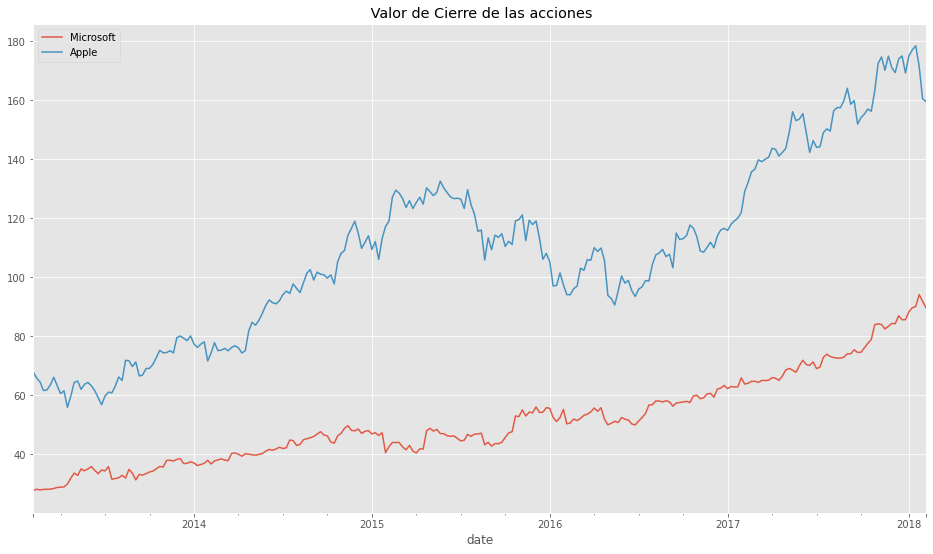

In [ ]:
plot_stock('MSFT')
plot_stock('AAPL')
plt.title(' Valor de Cierre de las acciones')
plt.legend();

###Calcular los rendimientos para que podamos comparar las acciones

---
Calcularemos la devolución desde el primer día de la compra. Por lo tanto, el rendimiento de un día determinado es cuánto se ganaría (o perdería), en porcentaje, si las acciones se vendieran en este día (los costos de transacción no se consideran)


In [ ]:
#df_acciones.head()
start = df_acciones.iloc[0]  #traemos la primera fila y la volvemos un vector
#calculamos el valor del retorno de la acción
returns = (df_acciones - start) / start
returns

symbol,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACN,ADBE,ADI,...,XL,XLNX,XOM,XRAY,XRX,XYL,YUM,ZBH,ZION,ZTS
date,,,,,,,,,,,,,,,,,,,,,
2013-02-10,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2013-02-17,-0.062777,-0.016949,0.001267,-0.031201,0.036690,-0.006185,0.019471,0.011595,-0.012398,0.010394,...,0.015227,0.016262,-0.002821,-0.001633,0.001256,0.043928,-0.020061,0.000659,0.008285,0.028139
2013-02-24,-0.072760,-0.080000,0.003929,-0.050886,0.060966,0.001280,0.004069,0.020325,-0.014571,-0.003939,...,0.026558,0.011997,0.006658,-0.025426,0.020101,0.025840,0.002297,-0.022544,-0.004143,-0.013918
2013-03-03,-0.069876,-0.077288,-0.032066,-0.093708,0.043034,0.023246,-0.023540,0.020597,0.018149,-0.010284,...,0.020538,-0.022927,0.009254,-0.039888,0.023869,0.014766,-0.001378,-0.011338,-0.004143,0.046899
2013-03-10,-0.045475,0.011525,-0.026109,-0.091078,0.030069,0.033909,0.007847,0.068749,0.060838,0.007659,...,0.050283,0.022927,0.004063,-0.003032,0.094221,0.049465,0.037060,-0.005933,0.048053,0.031467
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-01-14,0.591171,2.964068,0.469455,1.609861,1.768000,1.111324,0.709968,1.184013,3.985941,1.013567,...,0.256728,0.990403,-0.012301,0.534640,0.029209,1.600960,0.280551,0.609756,1.207125,1.281089
2018-01-21,0.620896,2.936271,0.483143,1.630051,1.886621,1.133930,0.723627,1.206384,4.003323,1.103720,...,0.255312,1.018395,-0.016477,0.445066,-0.001256,1.654485,0.283461,0.627950,1.225766,1.318306
2018-01-28,0.659716,2.597966,0.567047,1.527625,2.398897,1.249520,0.843069,1.217296,4.145706,1.053392,...,0.298513,0.917889,0.004401,0.465827,0.031093,1.746770,0.320061,0.664206,1.237780,1.423298


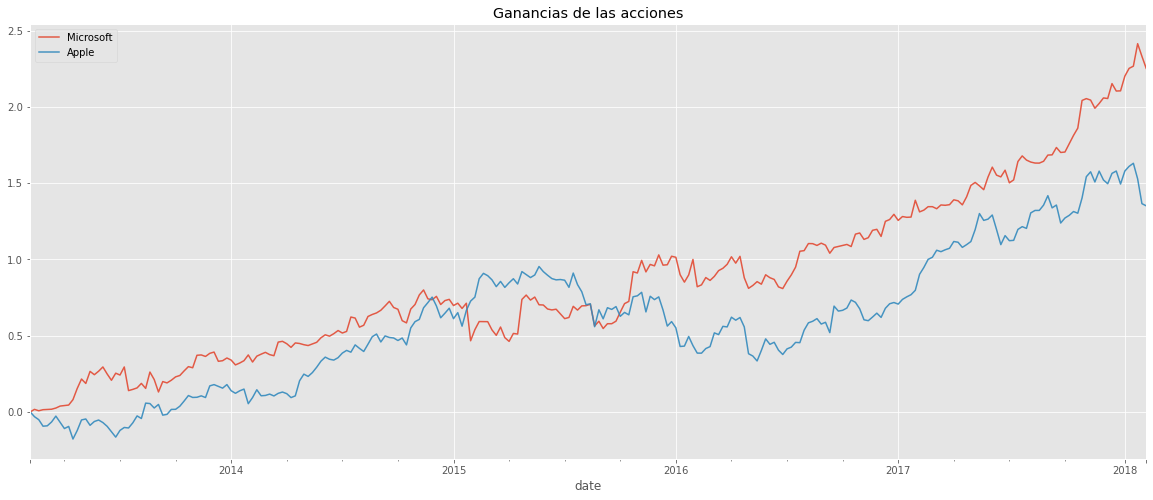

In [ ]:
plt.figure(figsize = (20,8))
plot_stock('MSFT', df_acciones=returns)
plot_stock('AAPL', df_acciones=returns)
plt.title('Ganancias de las acciones')
plt.legend();

###¿Cuáles fueron las acciones de mejor y peor desempeño?

### las mejores y las peores 5 empresas con retorno

In [ ]:
best = returns.iloc[-1].sort_values(ascending=False).head() # traemos las acciones mejor ordenadas
worst = returns.iloc[-1].sort_values().head()   #traemos las acciones con el orden inverso (las peores)
print ('--------peores--> ', worst.shape)
print(worst)
print ('--------mejores--> ',best.shape)
print(best)

--------peores-->  (5,)
symbol
CHK     -0.857143
RRC     -0.818157
DISCA   -0.676508
DISCK   -0.660217
MOS     -0.588762
Name: 2018-02-11 00:00:00, dtype: float64
--------mejores-->  (5,)
symbol
NVDA    17.496362
NFLX     9.233321
ALGN     6.159487
EA       6.084053
STZ      5.723705
Name: 2018-02-11 00:00:00, dtype: float64


####Las mejores

In [ ]:
print('____mejor rendimiento de las acciones_____')
names = pd.DataFrame({'name':[get_name(symbol) for symbol in best.index.tolist()]}, index = best.index)
best = pd.concat((best, names), axis=1)
best.head()

____mejor rendimiento de las acciones_____


,2018-02-11 00:00:00,name
symbol,,
NVDA,17.496362,Nvidia
NFLX,9.233321,Netflix
ALGN,6.159487,Align
EA,6.084053,Electronic Arts
STZ,5.723705,Constellation Brands


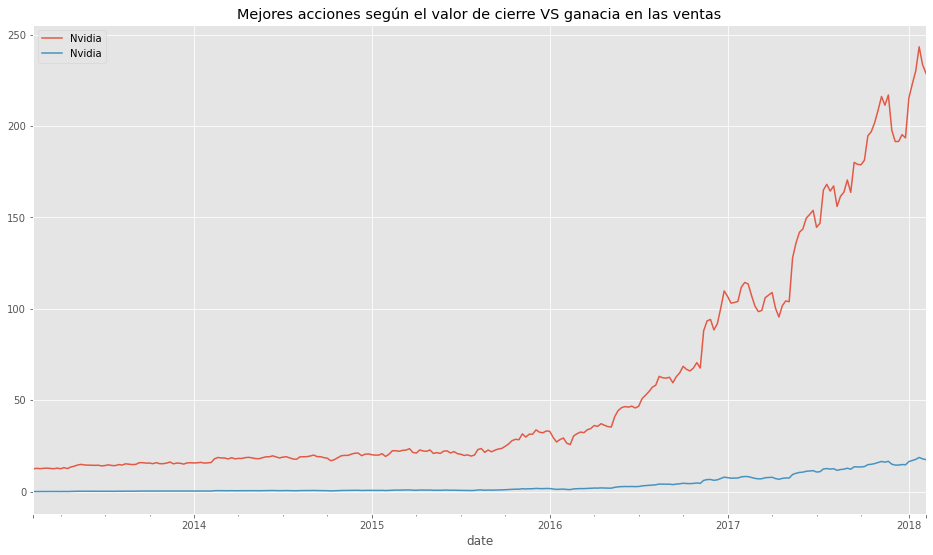

In [ ]:
plot_stock('NVDA')
plot_stock('NVDA', df_acciones=returns)
plt.title('Mejores acciones según el valor de cierre VS ganacia en las ventas')
plt.legend();

####las peores

In [ ]:
print('Peores perdidas de acciones')
names = pd.DataFrame({'name':[get_name(symbol) for symbol in worst.index.tolist()]}, index = worst.index)
worst = pd.concat((worst, names), axis=1)
worst

Peores perdidas de acciones


,2018-02-11 00:00:00,name
symbol,,
CHK,-0.857143,No tiene nombre el simbolo
RRC,-0.818157,No tiene nombre el simbolo
DISCA,-0.676508,Discovery (Series A)
DISCK,-0.660217,Discovery (Series C)
MOS,-0.588762,Mosaic


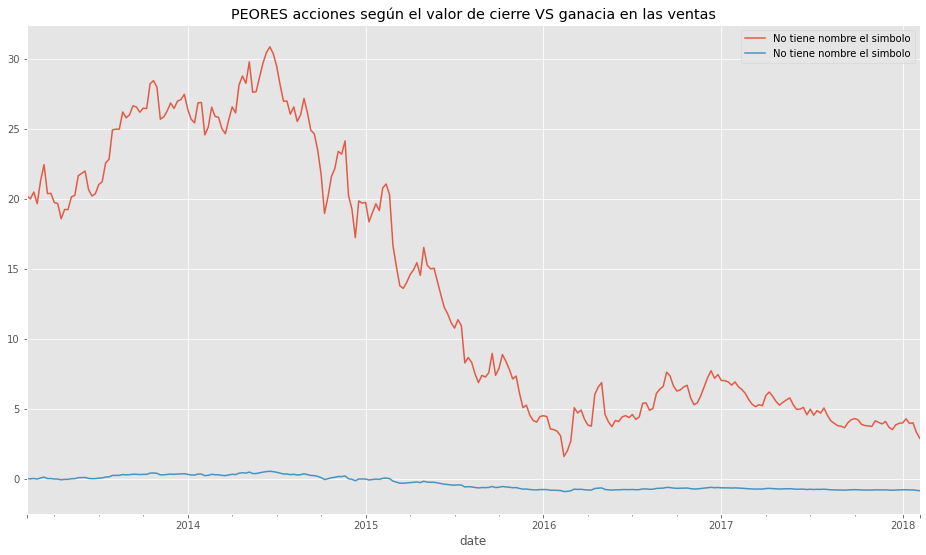

In [ ]:
plot_stock('CHK')
plot_stock('CHK', df_acciones=returns)
plt.title('PEORES acciones según el valor de cierre VS ganacia en las ventas')
plt.legend();

##Conociendo el indice de acciones del DOWN JONES

In [ ]:
#cargamos en una lista las acciones de las empresas que se riguen por el indice del DOWN JONES
down_acciones = [s for s in df_DowJones['Symbol'] if s in df_acciones.columns]  
dow_returns = returns[df_DowJones]   #calculamos las ganancias 
dow_returns.head()

symbol,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACN,ADBE,ADI,...,XL,XLNX,XOM,XRAY,XRX,XYL,YUM,ZBH,ZION,ZTS
date,,,,,,,,,,,,,,,,,,,,,
2013-02-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-02-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-02-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-03-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-03-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
print(down_acciones)

['MMM', 'AXP', 'AMGN', 'AAPL', 'BA', 'CAT', 'CVX', 'CSCO', 'KO', 'DIS', 'GS', 'HD', 'HON', 'IBM', 'INTC', 'JNJ', 'JPM', 'MCD', 'MRK', 'MSFT', 'NKE', 'PG', 'CRM', 'TRV', 'UNH', 'VZ', 'V', 'WBA', 'WMT']


### calculamos los mejores y los peores del DOWN JONES

In [ ]:
best_dow = dow_returns.iloc[-1].sort_values(ascending=False).head()
worst_dow = dow_returns.iloc[-1].sort_values().head()
print('mejores...', best_dow)
print('peores...', worst_dow)
#-----------------------
print('Las cinco mejores rendimientos de las acciones Dow Jones')
names = pd.DataFrame({'name':[get_name(symbol) for symbol in best_dow.index.tolist()]}, index = best_dow.index)
best_dow = pd.concat((best_dow, names), axis=1)
#best_dow

mejores... symbol
A      NaN
AAL    NaN
AAP    NaN
AAPL   NaN
ABBV   NaN
Name: 2018-02-11 00:00:00, dtype: float64
peores... symbol
A      NaN
AAL    NaN
AAP    NaN
AAPL   NaN
ABBV   NaN
Name: 2018-02-11 00:00:00, dtype: float64
Las cinco mejores rendimientos de las acciones Dow Jones


####Las mejores

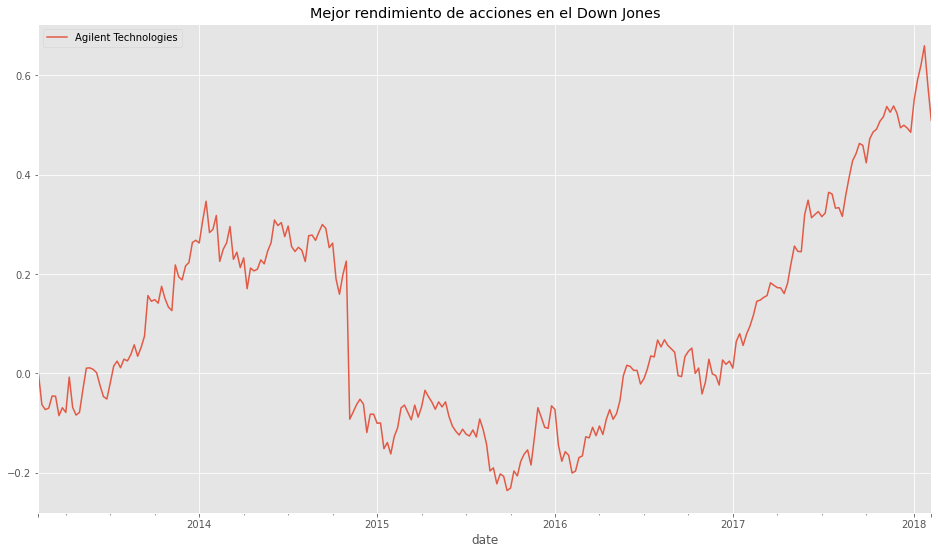

In [ ]:
plot_stock('A', df_acciones=returns)
plt.title('Mejor rendimiento de acciones en el Down Jones')
plt.legend();

####Las peores

In [ ]:
print('Las cinco peores rendimientos de las acciones Dow Jones')
names = pd.DataFrame({'name':[get_name(symbol) for symbol in worst_dow.index.tolist()]}, index = worst_dow.index)
worst_dow = pd.concat((worst_dow, names), axis=1)
worst_dow

Las cinco peores rendimientos de las acciones Dow Jones


,2018-02-11 00:00:00,name
symbol,,
A,NaN,Agilent Technologies
AAL,NaN,American Airlines Group
AAP,NaN,Advance Auto Parts
AAPL,NaN,Apple
ABBV,NaN,AbbVie


#DATOS DE MERCADEO DE VALORES (Acciones de Paypal)

---
Vamos a aplicar el algoritmo sobre un conjunto de datos de las acciones de Samsung en bolsa de Estados unidos, donde bucaremos :


*   la señal CLOSE (precio de cierre diario) 
*   la señal VOLUME (número de acciones que han cambiado de manos a lo largo de dicho período de tiempo).


https://es-us.finanzas.yahoo.com/


##Importando librerías

In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn import preprocessing  #para normalizar los datos antes de aplicar al algoritmo
from sklearn.metrics import pairwise_distances_argmin_min

import matplotlib.pyplot as plt
import seaborn as sb
from mpl_toolkits.mplot3d import Axes3D

#configuraciones basicas para PLT
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

##importando dataset

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/danielperezh/Machine_learning/main/PYPL.csv")
df.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-03-19,239.630005,243.149994,237.130005,241.279999,241.279999,10555100
1,2021-03-22,242.029999,246.949997,240.850006,244.384995,244.384995,5790200
2,2021-03-23,245.550003,246.839996,242.250000,243.770004,243.770004,5093200
3,2021-03-24,244.490005,244.970001,233.759995,234.270004,234.270004,6097300
4,2021-03-25,232.630005,235.339996,227.520004,234.240005,234.240005,8846600


## conociendo y Preprocesando los datos


In [3]:
#df.describe()
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

###Normalización de los datos.

---
Como ocurre con cualquier algoritmo de Machine Learning que utilice funciones de distancia, los datos deben ser normalizados antes de aplicarles el algoritmo. En este caso utilizaremos la función MinMaxScaler() que normaliza todos los datos entre [0, 1].


###Eliminando columnas que no necesitaremos (por ahora)

---
extraemos la columna DATE (fecha) que no usaremos en el algoritmo k-means. Antes de extraerla la guardaremos en la variable dates, ya que volveremos a insertarla en nuestro dataframe tras aplicar el algoritmo


In [4]:
df = df.dropna()
df = df.reset_index(drop=True)

In [5]:
# Eliminamos columna de fecha que no usaremos en el algoritmo.
dates = df['Date'] # Guardamos la columna Date.
df = df.drop('Date', 1) # Borramos la columna del dataframe.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


###Normalización de los datos.

---
Como ocurre con cualquier algoritmo de Machine Learning que utilice funciones de distancia, los datos deben ser normalizados antes de aplicarles el algoritmo. En este caso utilizaremos la función MinMaxScaler() que normaliza todos los datos entre [0, 1].


In [6]:
#%% Se normalizan los datos con MinMax()
min_max_scaler = preprocessing.MinMaxScaler() 
df_escalado = min_max_scaler.fit_transform(df)
df_escalado = pd.DataFrame(df_escalado) # Hay que convertir a DF el resultado.
df_escalado = df_escalado.rename(columns = {0: 'Close', 1: 'Volume'})

In [7]:
df_escalado.head()
df_escalado.isnull().sum()

Close     0
Volume    0
2         0
3         0
4         0
5         0
dtype: int64

###Representación gráfica de los datos.

---


*   Ahora podemos echar un vistazo a la representación gráfica de nuestros datos. En el eje x representaremos el precio de cierre (CLOSE) y en el eje y el volumen (VOLUMEN)
*   VAMOS A representar gráficamente los datos normalizados, pero que, si hubiésemos representado los datos sin normalizar la gráfica sería exactamente igual, con la única diferencia que la escala de los ejes sería diferente.





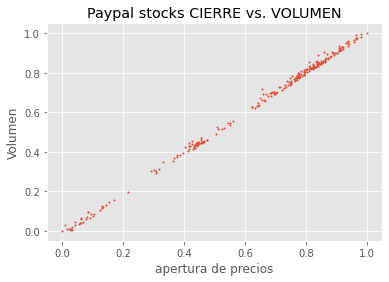

In [14]:
#%% Representación gráfica de los datos.
x = df_escalado['Close'].values
y = df_escalado['Volume'].values
plt.xlabel('apertura de precios')
plt.ylabel('Volumen')
plt.title('Paypal stocks CIERRE vs. VOLUMEN')
plt.plot(x,y,'o',markersize=1)

##Aplicación de k-means.

---
El primer paso antes de aplicar k-means es decidir qué valor de k (número de clústeres) queremos usar:


1.    Una forma de elegir este valor k es por criterio propio: si conocemos bien la distribución de nuestros datos y queremos “forzar” un número determinado de clústeres simplemente lo elegimos
2.    realizar una gráfica elbow o de codo para determinar el número óptimo de clústeres. Hacemos una iteración de k-means variando el valor de k, de forma que representamos en el eje x dicho valor de k y en el eje y la suma de los errores cuadráticos (SSE). De esta forma podemos elegir el valor de k dónde se produce el “codo”   (**----ESTA ME GUSTA MÁS---**)




###Realizar una gráfica elbow o de codo

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklea

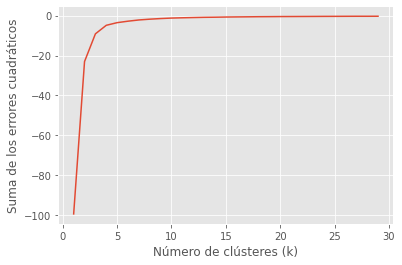

In [9]:
#%% Curva elbow para determinar valor óptimo de k.
nc = range(1, 30) # El número de iteraciones que queremos hacer.
kmeans = [KMeans(n_clusters=i) for i in nc]
score = [kmeans[i].fit(df_escalado).score(df_escalado) for i in range(len(kmeans))]
score
plt.xlabel('Número de clústeres (k)')
plt.ylabel('Suma de los errores cuadráticos')
plt.plot(nc,score)

####NOTA: 

---


**No hay una solución, un valor de k, más correcto que otro**, ya que el objetivo de una clusterización con k-means es obtener información útil nuestros datos, por lo que **nuestra interpretación a posteriori de los clústeres creados marcará la calidad de nuestra solución** escogida

###Aplicar el algoritmo de k-mean

In [10]:
#%% Aplicación de k-means con k = 5.
kmeans = KMeans(n_clusters=5).fit(df_escalado)
centroids = kmeans.cluster_centers_
print(centroids)   #coordenadas de los centroides

[[0.91908189 0.92826585 0.92280905 0.92464639 0.92464639 0.02073592]
 [0.43320852 0.43161328 0.42616791 0.43102044 0.43102044 0.09338821]
 [0.68848535 0.69198914 0.6816567  0.68467744 0.68467744 0.06112582]
 [0.80859822 0.81521541 0.81088412 0.81174845 0.81174845 0.01976636]
 [0.07770834 0.0662679  0.06842953 0.07425737 0.07425737 0.19647644]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


###Etiquetado de datos.

---
asignamos cada registro de nuestro dataset a uno de los clústers


In [11]:
#%% Etiquetamos nuestro dataframe.
labels = kmeans.predict(df_escalado)   #generamos las etiquetas de cada clouster
df['label'] = labels                   #añadimos la columna “label” a nuestro dataframe original

df.insert(0, 'Date', dates)           #%% Añadimos la columna de fecha

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [12]:
df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume,label
0,2021-03-19,239.630005,243.149994,237.130005,241.279999,241.279999,10555100,2
1,2021-03-22,242.029999,246.949997,240.850006,244.384995,244.384995,5790200,2
2,2021-03-23,245.550003,246.839996,242.250000,243.770004,243.770004,5093200,2
3,2021-03-24,244.490005,244.970001,233.759995,234.270004,234.270004,6097300,2
4,2021-03-25,232.630005,235.339996,227.520004,234.240005,234.240005,8846600,2
5,2021-03-26,233.619003,241.309998,232.300003,241.029999,241.029999,8217600,2
6,2021-03-29,241.580002,243.199997,233.610001,235.669998,235.669998,7510900,2
7,2021-03-30,236.880005,238.360001,232.630005,236.539993,236.539993,6242000,2
8,2021-03-31,238.110001,245.229996,237.270004,242.839996,242.839996,7633400,2
9,2021-04-01,248.039993,252.649002,246.039993,247.539993,247.539993,6990100,2


##Representación gráfica de los clústeres k-means.

---
Una vez con los datos etiquetados, podemos visualizar gráficamente en dos dimensiones el clustering realizado por k-means, ya que hemos usado sólo dos variable


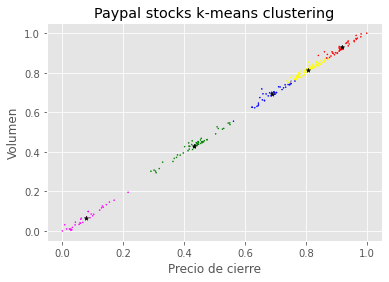

In [13]:
#%% Plot k-means clustering.
colores=['red','green','blue','yellow','fuchsia']
asignar=[]
for row in labels:
     asignar.append(colores[row])
plt.scatter(x, y, c=asignar, s=1)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', c='black', s=20) # Marco centroides.
plt.xlabel('Precio de cierre')
plt.ylabel('Volumen')
plt.title('Paypal stocks k-means clustering')
plt.show()

Que podemos inferir???

##Clasificación de nuevas muestras.

---
Supongamos que nuestros nuevos datos a categorizar son los siguientes:


*   CLOSE: 100.000
*   VOLUME: 5.500.000






### Agregando datos de forma clasica (paso a paso)

In [ ]:
close = 100000
volume = 5500000

nuevo_dato = pd.DataFrame([[close,volume]]) # Nueva muestra
nuevo_dato = nuevo_dato.rename(columns = {0: 'Close', 1: 'Volume'})

#### Normalizamos los nuevos datos

In [ ]:
#agregamos los datos al dataframe original
df_n = df.append(nuevo_dato)

####borramos columnas que no tenemos

---

Nuestro nuevo dataframe df_n tiene aun las columnas “date” y “label” del datafame original, así que las eliminamos y resetamos el índice

In [ ]:
df_n = df_n.drop('Date', 1)
df_n = df_n.drop('label', 1)
df_n = df_n.reset_index(drop=True)

####Aplicamos normalización de datos [0 - 1]

In [ ]:
min_max_scaler = preprocessing.MinMaxScaler() 
df_escalado = min_max_scaler.fit_transform(df_n)
df_escalado = pd.DataFrame(df_escalado) # Hay que convertir a DF el resultado.
df_escalado = df_escalado.rename(columns = {0: 'Close', 1: 'Volume'})

In [ ]:
df_escalado.iloc[-3:]   #ver los ultimos registros

,Close,Volume,2,3,4,5
425,0.727463,0.635681,0.716102,0.584348,0.717624,0.144704
426,0.706499,0.631925,0.711864,0.603478,0.739656,0.180381
427,NaN,NaN,NaN,1.000000,NaN,0.060904


###Agregando datos usando NUMPY

---

Podemos introducir estos nuevos datos ya normalizados a mano o extraerlos en forma de vector numpy:

In [ ]:
close_n = df_escalado['Close'][2784]
volume_n = df_escalado['Volume'][2784]
import numpy as np
X_new = np.array([[close_n, volume_n]]) # Nueva muestra

KeyError: ignored